S. Vysotsky, Yandex Education

**KNN brute force implementation**

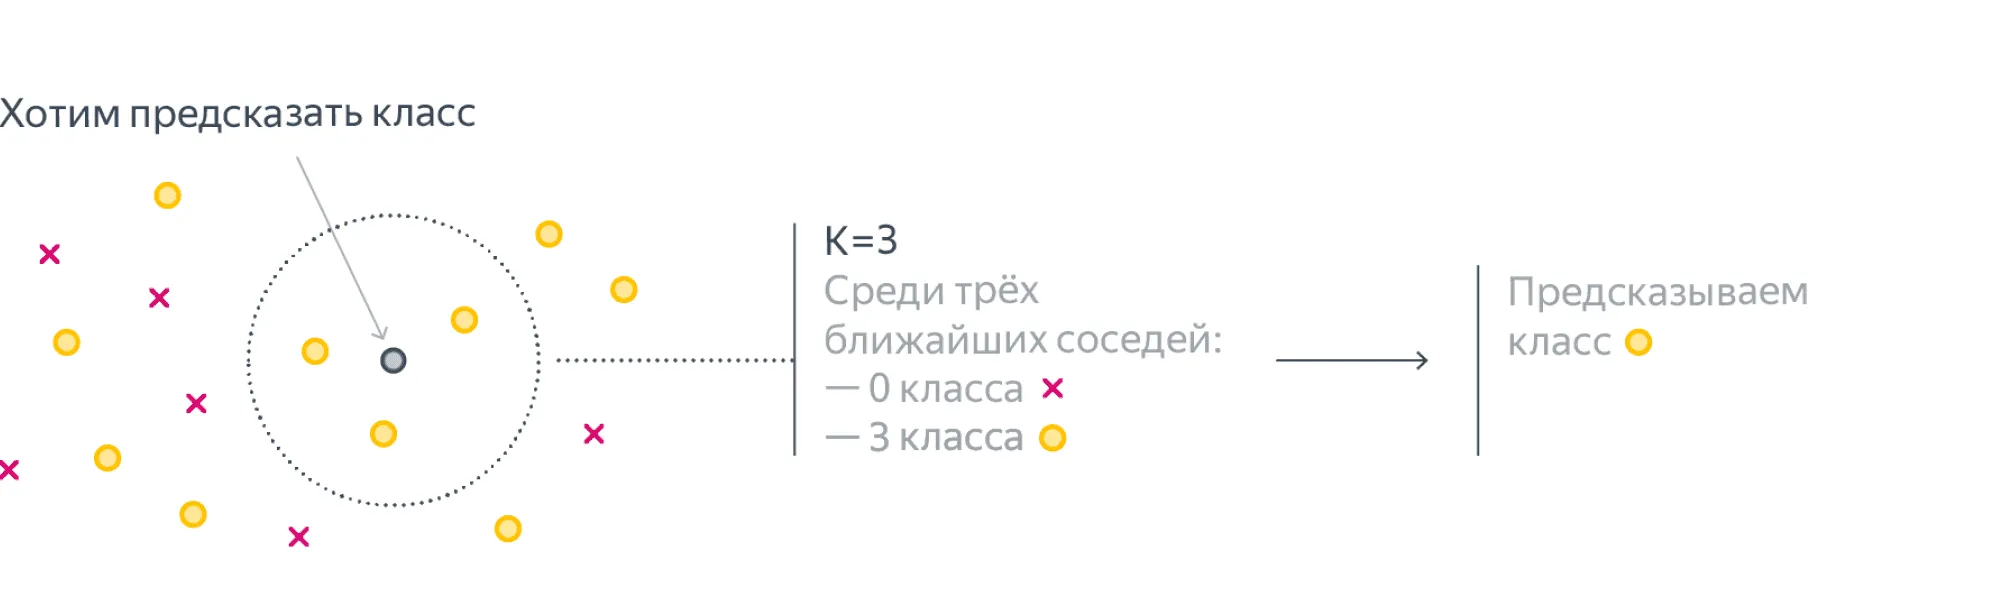

[Гипотеза компактности](https:http://www.machinelearning.ru/wiki/index.php?title=%D0%93%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BA%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8//)


https://habr.com/ru/companies/vk/articles/338360/`

In [ ]:
import numpy as np
from collections import Counter

class KNearestNeighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i][j] = np.sqrt(np.sum(np.square(X[i, :] - self.X_train[j, :])))
        return dists

    def compute_distances_one_loop(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            dists[i, :] = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis = 1))
        return dists

    def compute_distances_no_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        dists = np.sqrt(-2 * np.dot(X, self.X_train.T) +
                        np.sum(np.square(self.X_train), axis=1) +
                        np.sum(np.square(X), axis=1)[:, np.newaxis])
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            sortix = np.argsort(dists[i, :])
            closest_y = self.y_train[sortix[:min(k, len(sortix))]]
            y_pred[i] = Counter(closest_y).most_common(1)[0][0]
        return y_pred

In [ ]:
import numpy as np
from collections import Counter

class KNN:
  def __init__(self):
    pass
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    self.len_train = X.shape[0]

  def predict(self, X_test, k=1):
    len_test = X_test.shape[0]
    len_train = self.X_train.shape[0]
    distances = np.zeros((len_test, len_train))
    for i in range(len_test):
      distances[i, :] = np.sqrt(np.sum(np.square(self.X_train - X_test[i, :]),
                                       axis=1
                                       ))
    return distances, self.predict_labels(distances, k)

  def predict_labels(self, distances, k=1):
    len_test = distances.shape[0]
    y_pred = np.zeros(len_test)
    for i in range(len_test):
      arg_sortdist = np.argsort(distances[i, :])
      targets = self.y_train[arg_sortdist[:min(k, len(arg_sortdist))]]
      y_pred[i] = Counter(targets).most_common(1)[0][0]
    return y_pred



### data and tests

In [ ]:
from sklearn import datasets
dataset = datasets.load_digits()
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
np.random.permutation(dataset.data)

array([[ 0.,  0.,  4., ...,  1.,  0.,  0.],
       [ 0.,  0.,  4., ..., 11.,  1.,  0.],
       [ 0.,  0.,  0., ..., 15.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  8.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [ ]:
test_border = 100
X_train, y_train = dataset.data[test_border:], dataset.target[test_border:]
X_test, y_test = dataset.data[:test_border], dataset.target[:test_border]

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
num_test = X_test.shape[0]

Training data shape:  (1697, 64)
Training labels shape:  (1697,)
Test data shape:  (100, 64)
Test labels shape:  (100,)


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

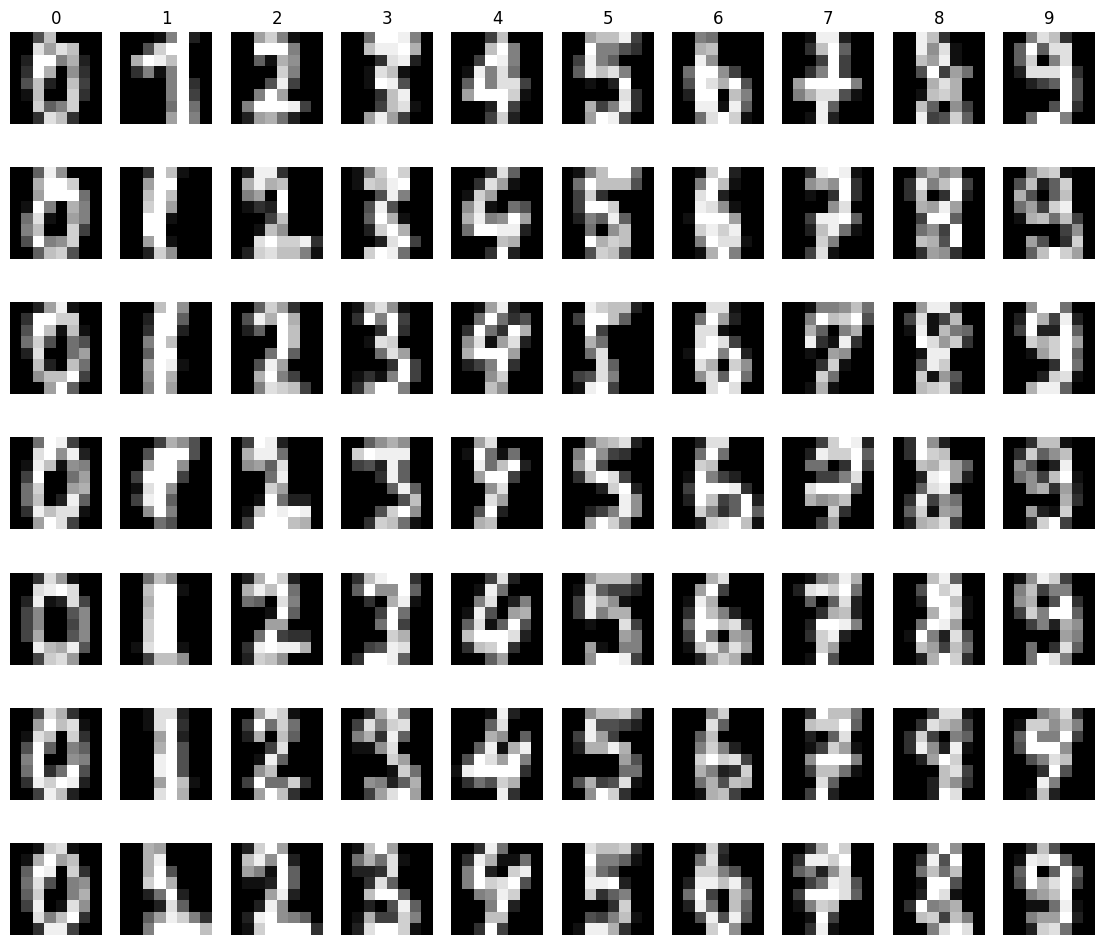

In [ ]:
classes = list(np.arange(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((8, 8)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
X_train.shape

(1697, 64)

In [ ]:
classifier = KNN()
classifier.fit(X_train, y_train)

In [ ]:
classifier

In [ ]:
X_test

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  2., 15., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.]])

In [ ]:
y_pred = classifier.predict(X_test, k=1)
y_pred

(array([[50.42816673, 34.278273  , 45.22167622, ..., 50.37856687,
         37.06750599, 47.03190407],
        [46.86149806, 54.24020649, 44.27188724, ..., 38.58756276,
         48.56953778, 50.32891813],
        [53.07541804, 48.52834223, 56.18718715, ..., 38.34057903,
         50.7740091 , 43.95452195],
        ...,
        [14.59451952, 42.60281681, 46.55104725, ..., 42.87190222,
         43.58898944, 47.9165942 ],
        [62.54598308, 57.27128425, 47.79121258, ..., 52.41183073,
         49.24428901, 49.80963762],
        [46.92547283, 50.7937004 , 44.36214603, ..., 39.73663297,
         56.06246516, 50.24937811]]),
 array([0., 1., 2., 3., 4., 9., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 9., 5., 5.,
        6., 5., 0., 3., 8., 9., 8., 4., 1., 7., 7., 3., 5., 1., 0., 0., 2.,
        2., 7., 8., 2., 0., 1., 2., 6., 3., 3., 7., 3., 3., 4., 6., 6., 6.,
        4., 4., 1., 5., 0., 9., 5., 2., 8., 1., 0., 0., 1., 7., 6., 3

In [ ]:
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)

In [ ]:
dists = classifier.compute_distances_one_loop(X_test)
print(dists.shape)

(100, 1697)


In [ ]:
dists

array([[50.42816673, 34.278273  , 45.22167622, ..., 50.37856687,
        37.06750599, 47.03190407],
       [46.86149806, 54.24020649, 44.27188724, ..., 38.58756276,
        48.56953778, 50.32891813],
       [53.07541804, 48.52834223, 56.18718715, ..., 38.34057903,
        50.7740091 , 43.95452195],
       ...,
       [14.59451952, 42.60281681, 46.55104725, ..., 42.87190222,
        43.58898944, 47.9165942 ],
       [62.54598308, 57.27128425, 47.79121258, ..., 52.41183073,
        49.24428901, 49.80963762],
       [46.92547283, 50.7937004 , 44.36214603, ..., 39.73663297,
        56.06246516, 50.24937811]])

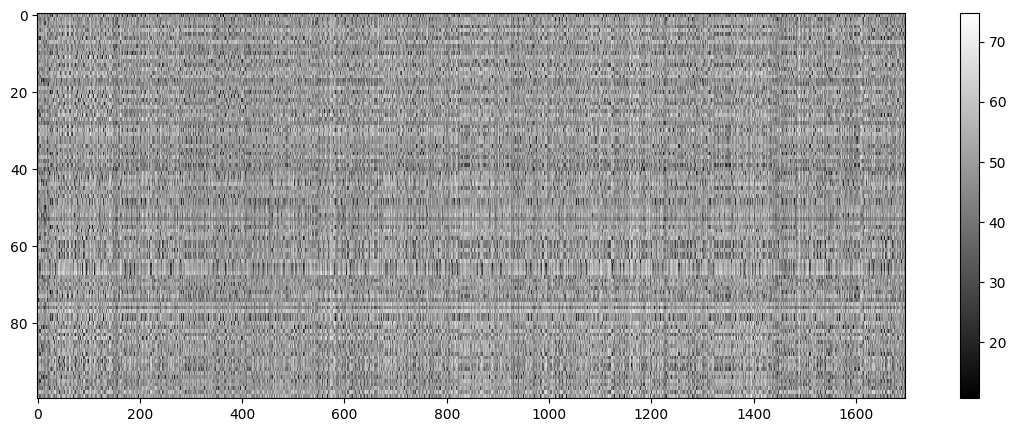

In [ ]:
plt.figure(figsize=(14, 5))
plt.imshow(dists, interpolation='none', aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
y_test_pred = classifier.predict_labels(dists)

In [ ]:
y_test_pred

array([0., 1., 2., 3., 4., 9., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 9., 5., 5.,
       6., 5., 0., 3., 8., 9., 8., 4., 1., 7., 7., 3., 5., 1., 0., 0., 2.,
       2., 7., 8., 2., 0., 1., 2., 6., 3., 3., 7., 3., 3., 4., 6., 6., 6.,
       4., 4., 1., 5., 0., 9., 5., 2., 8., 1., 0., 0., 1., 7., 6., 3., 2.,
       1., 7., 4., 6., 3., 1., 3., 9., 1., 7., 1., 8., 4., 3., 1.])

In [ ]:
# k=1 1NN-Nearest Neighbor
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 95 / 100 correct => accuracy: 0.950000


In [ ]:
# k=5
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 93 / 100 correct => accuracy: 0.930000


### comparing handcrafted and `sklearn` implementations


In [ ]:
from sklearn import neighbors

In [ ]:
implemented_knn = KNearestNeighbor()
implemented_knn.fit(X_train, y_train)

In [ ]:
n_neighbors = 1
external_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
external_knn.fit(X_train, y_train)
print('sklearn kNN (k=1) implementation achieves: {} accuracy on the test set'.format(
    external_knn.score(X_test, y_test)
))
y_predicted = implemented_knn.predict(X_test, k=n_neighbors).astype(int)
accuracy_score = sum((y_predicted==y_test).astype(float)) / num_test
print('Handcrafted kNN (k=1) implementation achieves: {} accuracy on the test set'.format(accuracy_score))
assert np.array_equal(
    external_knn.predict(X_test),
    y_predicted
), 'Labels predicted by handcrafted and sklearn kNN implementations are different!'
print('\nsklearn and handcrafted kNN implementations provide same predictions')
print('_'*76)


n_neighbors = 5
external_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
external_knn.fit(X_train, y_train)
print('sklearn kNN (k=5) implementation achieves: {} accuracy on the test set'.format(
    external_knn.score(X_test, y_test)
))
y_predicted = implemented_knn.predict(X_test, k=n_neighbors).astype(int)
accuracy_score = sum((y_predicted==y_test).astype(float)) / num_test
print('Handcrafted kNN (k=5) implementation achieves: {} accuracy on the test set'.format(accuracy_score))
assert np.array_equal(
    external_knn.predict(X_test),
    y_predicted
), 'Labels predicted by handcrafted and sklearn kNN implementations are different!'
print('\nsklearn and handcrafted kNN implementations provide same predictions')
print('_'*76)



sklearn kNN (k=1) implementation achieves: 0.95 accuracy on the test set
Handcrafted kNN (k=1) implementation achieves: 0.95 accuracy on the test set

sklearn and handcrafted kNN implementations provide same predictions
____________________________________________________________________________
sklearn kNN (k=5) implementation achieves: 0.93 accuracy on the test set
Handcrafted kNN (k=5) implementation achieves: 0.93 accuracy on the test set

sklearn and handcrafted kNN implementations provide same predictions
____________________________________________________________________________


### numpy profits: measuring time


In [ ]:
X_train_big = np.vstack([X_train]*5)
X_test_big = np.vstack([X_test]*5)
y_train_big = np.hstack([y_train]*5)
y_test_big = np.hstack([y_test]*5)

In [ ]:
classifier_big = KNearestNeighbor()
classifier_big.fit(X_train_big, y_train_big)


def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier_big.compute_distances_two_loops, X_test_big)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier_big.compute_distances_one_loop, X_test_big)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier_big.compute_distances_no_loops, X_test_big)
print('No loop version took %f seconds' % no_loop_time)

# You should see significantly faster performance with the fully vectorized implementation!

Two loop version took 34.365352 seconds
One loop version took 1.525614 seconds
No loop version took 0.255890 seconds
